In [22]:
from run_pde_model import pde_3D_model_implicit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
from IPython.display import HTML

import numpy.ma as ma

In [25]:
parameters = {
    'time_start': 0,
    'time_end': 100,
    'time_step': 0.01,
    'space_start': 0,
    'space_end': 10,
    'space_points': 10,
    'S0': 1,
    'R0': 0.01,
    'N0': 1,
    'S0_distribution': 'patch',
    'R0_distribution': 'uniform',
    'N0_distribution': 'uniform',
    'S0_extra_parameters': ['circle', 0, 0,1],
    'R0_extra_parameters': [0.1, 0.1],
    'N0_extra_parameters': [0.1, 0.1],
    'growth_rate_S': 0.4,
    'growth_rate_R': 0.4,
    'growth_rate_N': 0.4,
    'carrying_capacity': 4.9,
    'diffusion_coefficient_S': 10,
    'diffusion_coefficient_R': 0.01,
    'diffusion_coefficient_N': 0.01,
    'standard_deviation_S': 0.01,
    'standard_deviation_R': 0.01,
    'standard_deviation_N': 0.01,
    'maximum_tolerated_dose': 1,
    'death_rate_S': 0.03,
    'death_rate_R': 0.03,
    'death_rate_N': 0.03,
    'division_rate_S': 0.3,
    'division_rate_N': 0.3,
    'therapy_type': 'adaptive',
    'current_state': 1,
    'time_boundary_conditions': 'Periodic',
    'S0_left': 0,
    'R0_left': 0,
    'S0_right': 0,
    'R0_right': 0,
    'diffusion_type': 'standard'
}

S, R, N, D, X, T = pde_3D_model_implicit(parameters)

pde_3D_model_implicit


KeyboardInterrupt: 

In [ ]:
# make intial plot
def animate3d(data,parameters,figax):
    fig,ax = figax
    # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    x = np.linspace(parameters['space_start'],parameters['space_end'],parameters['space_points'])
    y = np.linspace(parameters['space_start'],parameters['space_end'],parameters['space_points'])
    X, Y = np.meshgrid(x, y)
    Z = data[0,:,:]
    zmin = 0 
    zmax = 1
    surf = ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis,linewidth=0, antialiased=False)
    ax.set(xlim=(parameters['space_start'],parameters['space_end']),ylim=(parameters['space_start'],parameters['space_end']),zlim = (zmin,zmax))
    def update(i):
        ax.clear()
        fig.suptitle(f"t = {i:.1f}")
        ax.set(xlim=(parameters['space_start'],parameters['space_end']),ylim=(parameters['space_start'],parameters['space_end']),zlim = (zmin,zmax))
        Z = data[i,:,:]
        surf = ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis,linewidth=0, antialiased=False)
    T = int((parameters['time_end']-parameters["time_start"])/parameters['time_step'])
    anim = animation.FuncAnimation(fig,update,frames=T)
    return anim

fig,ax = plt.subplots(1,3,figsize=(10,7),subplot_kw={"projection": "3d"})
ax[0].set_title('S')
anim = animate3d(S,parameters,(fig,ax[0]))
ax[1].set_title('R')
anim = animate3d(R,parameters,(fig,ax[1]))
ax[2].set_title('N')
anim = animate3d(N,parameters,(fig,ax[2]))
HTML(anim.to_jshtml()) 


In [29]:
#test surface animation 

N = 150 # Meshsize
fps = 10 # frame per sec
frn = 50 # frame number of the animation

x = np.linspace(-4,4,N+1)
x, y = np.meshgrid(x, x)
zarray = np.zeros((N+1, N+1, frn))

f = lambda x,y,sig : 1/np.sqrt(sig)*np.exp(-(x**2+y**2)/sig**2)

for i in range(frn):
    zarray[:,:,i] = f(x,y,1.5+np.sin(i*2*np.pi/frn))

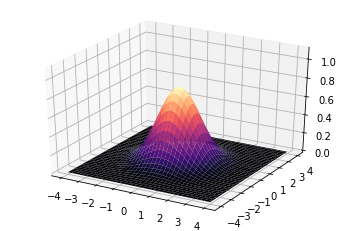

In [27]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, zarray[:,:,frame_number], cmap="magma")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(x, y, zarray[:,:,0], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(0,1.1)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(zarray, plot), interval=1000/fps)

HTML(ani.to_jshtml()) 


[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
###
[[ 0.70886129  0.57562789  0.42921793 ...  0.27541086  0.42921793
   0.57562789]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 ...
 [ 0.27541086  0.09046523 -0.09334004 ... -0.26940744 -0.09334004
   0.09046523]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]] (40, 40)


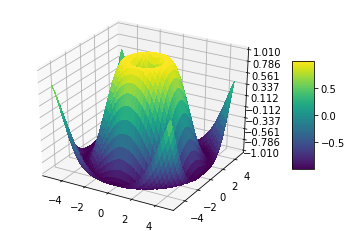

In [60]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
print(X)
Y = np.arange(-5, 5, 0.25)
print(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print('###')
print(Z, np.shape(Z))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [65]:
#test array 
print(Z)
tol = 0
Zm = Z.copy()
mask = Zm <= tol
Zm[mask] = 0
print('--------------------')

print(Zm)

[[ 0.70886129  0.57562789  0.42921793 ...  0.27541086  0.42921793
   0.57562789]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 ...
 [ 0.27541086  0.09046523 -0.09334004 ... -0.26940744 -0.09334004
   0.09046523]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]]
--------------------
[[0.70886129 0.57562789 0.42921793 ... 0.27541086 0.42921793 0.57562789]
 [0.57562789 0.4208019  0.2570234  ... 0.09046523 0.2570234  0.4208019 ]
 [0.42921793 0.2570234  0.08068791 ... 0.         0.08068791 0.2570234 ]
 ...
 [0.27541086 0.09046523 0.         ... 0.         0.         0.09046523]
 [0.42921793 0.2570234  0.08068791 ... 0.         0.08068791 0.2570234 ]
 [0.57562789 0.4208019  0.2570234  ... 0.09046523 0.2570234  0.4208019 ]]


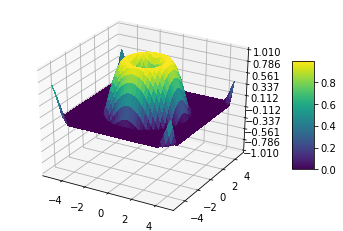

In [66]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, Zm, cmap=plt.cm.viridis,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()